In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

FILENAME = 'Employee-Attrition.csv'


In [4]:
try:
    df = pd.read_csv(FILENAME)
except FileNotFoundError:
    raise FileNotFoundError(
        f"Archivo no encontrado: {FILENAME}\n"
        "Descarga el CSV desde Kaggle y colócalo en esa carpeta."
    )

In [5]:
total = len(df)
desertores = df['Attrition'].value_counts().get('Yes', 0)
tasa_general = desertores / total * 100
print(f"Total de empleados: {total}")
print(f"Empleados que desertaron: {desertores}")
print(f"Tasa de deserción general: {tasa_general:.2f}%\n")

Total de empleados: 1470
Empleados que desertaron: 237
Tasa de deserción general: 16.12%



In [6]:
pivot = df.pivot_table(
    index='TrainingTimesLastYear',
    columns='Attrition',
    values='EmployeeNumber',
    aggfunc='count',
    fill_value=0
)
pivot['Tasa_Desercion (%)'] = pivot['Yes'] / (pivot['Yes'] + pivot['No']) * 100
print("Tasa de deserción por número de entrenamientos (último año):")
print(pivot[['Yes', 'No', 'Tasa_Desercion (%)']])
print()

Tasa de deserción por número de entrenamientos (último año):
Attrition              Yes   No  Tasa_Desercion (%)
TrainingTimesLastYear                              
0                       15   39           27.777778
1                        9   62           12.676056
2                       98  449           17.915905
3                       69  422           14.052953
4                       26   97           21.138211
5                       14  105           11.764706
6                        6   59            9.230769



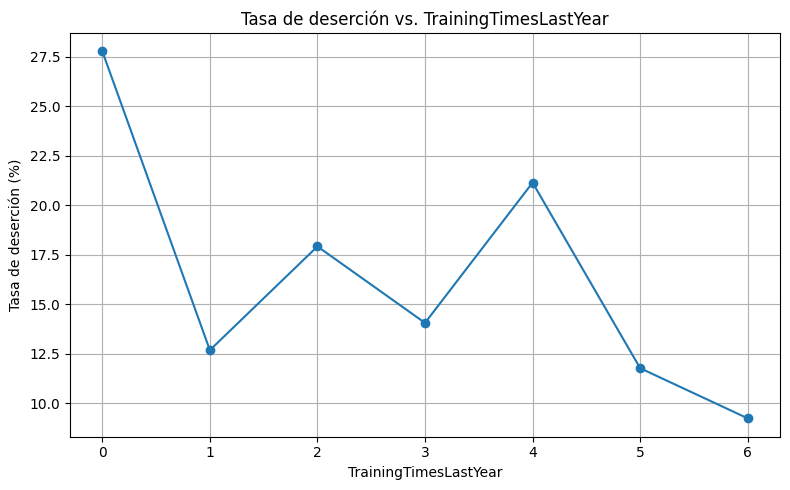

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(pivot.index, pivot['Tasa_Desercion (%)'], marker='o', linestyle='-')
plt.title('Tasa de deserción vs. TrainingTimesLastYear')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Tasa de deserción (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
vars_corr = ['Attrition_flag', 'TrainingTimesLastYear', 'Age', 'MonthlyIncome']
corr_matrix = df[vars_corr].corr()
print("Correlación con Attrition_flag:")
print(corr_matrix['Attrition_flag'].sort_values(ascending=False))

Correlación con Attrition_flag:
Attrition_flag           1.000000
TrainingTimesLastYear   -0.059478
Age                     -0.159205
MonthlyIncome           -0.159840
Name: Attrition_flag, dtype: float64
